In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:

from sklearn.linear_model import LogisticRegression 

from sklearn.tree import DecisionTreeClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Let's load all the datasets
data_00 = pd.read_csv("dataset-of-00s.csv")
data_10 = pd.read_csv("dataset-of-10s.csv")
data_60 = pd.read_csv("dataset-of-60s.csv")
data_70 = pd.read_csv("dataset-of-70s.csv")
data_80 = pd.read_csv("dataset-of-80s.csv")
data_90 = pd.read_csv("dataset-of-90s.csv")

In [4]:
stacked = sorted(glob('dataset-of-*.csv'))

In [5]:
final_data = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in stacked),ignore_index = True)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
final_data.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,filename
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.1590,0.532,133.061,196707,4,30.88059,13,1,dataset-of-00s.csv
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.1480,0.688,92.988,242587,4,41.51106,10,1,dataset-of-00s.csv
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.1740,0.300,86.964,338893,4,65.32887,13,0,dataset-of-00s.csv
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.1920,0.333,148.440,255667,4,58.59528,9,0,dataset-of-00s.csv
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.1250,0.631,112.098,193760,4,22.62384,10,1,dataset-of-00s.csv
5,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,0.26800,0.1360,0.969,135.347,192720,4,28.29051,10,0,dataset-of-00s.csv
6,Divorced,Blacklisted,spotify:track:0iAdSLiQBIizTAiLUP7p5E,0.365,0.922,1,-2.644,1,0.0710,0.002850,0.00000,0.3210,0.290,77.250,89427,4,45.77202,4,0,dataset-of-00s.csv
7,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.220000,0.00000,0.1930,0.746,124.711,239240,4,35.59732,10,1,dataset-of-00s.csv
8,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.053800,0.00000,0.0759,0.389,153.105,253640,4,19.65701,11,1,dataset-of-00s.csv
9,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.647,0.324,7,-9.679,1,0.0377,0.354000,0.00000,0.1150,0.344,124.213,314286,3,32.66343,16,0,dataset-of-00s.csv


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
feature_names = list(final_data.columns.values)
feature_names.remove('target')
feature_names.remove('track')
feature_names.remove('uri')
feature_names.remove('filename')
feature_names.remove('artist')

X = final_data[feature_names]
Y = final_data['target']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# MODEL BUILDING


# LOGISTIC REGRESSION


In [9]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, Y_train)
LR_Predict = LR_Model.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(Y_test, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.5075407443444417
AUC: 0.5075155986719065


In [10]:
cm = confusion_matrix(Y_test, LR_Predict)
print(cm)

[[1873 2236]
 [1813 2300]]


In [11]:
def performance(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN) 
    
    print('Sensitivity : ', TPR)
    print('Specificity : ', TNR)
    print('Precision : ', PPV)
    print('Negative predictive value : ', NPV)
    print('False positive rate : ', FPR)
    print('False negative rate : ', FNR)
    print('False discovery rate : ', FDR)
    print('Accuracy : ', ACC)

In [12]:
performance(cm)

Sensitivity :  0.5592025285679553
Specificity :  0.45582866877585787
Precision :  0.5070546737213404
Negative predictive value :  0.5081389039609333
False positive rate :  0.5441713312241421
False negative rate :  0.44079747143204473
False discovery rate :  0.4929453262786596
Accuracy :  0.5075407443444417


In [13]:
print(classification_report(Y_test, LR_Predict))

              precision    recall  f1-score   support

           0       0.51      0.46      0.48      4109
           1       0.51      0.56      0.53      4113

    accuracy                           0.51      8222
   macro avg       0.51      0.51      0.51      8222
weighted avg       0.51      0.51      0.51      8222



# DECISION TREE

In [14]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, Y_train)
DT_Predict = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(Y_test, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(Y_test, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.7098029676477743
AUC: 0.7098045557370314


# KNN

In [15]:

knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(X_train,Y_train)
knn_predict=model_2.predict(X_test)
print(accuracy_score(knn_predict,Y_test))

KNNAUC = roc_auc_score(Y_test, knn_predict) 
print("AUC: " + str(KNNAUC))

0.5670153247385065
AUC: 0.5669927374735042


# ADABOOST

In [16]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
model_7=abc.fit(X_train,Y_train)
abc_predict=model_7.predict(X_test)
print(accuracy_score(abc_predict,Y_test))

ada = roc_auc_score(Y_test, abc_predict) 
print("AUC: " + str(ada))

0.7590610557042082
AUC: 0.7590283957395593


# NEURAL NETWORKS

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import tensorflow as tf

In [19]:
ann = tf.keras.models.Sequential()

In [20]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [21]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [22]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
history = ann.fit(X_train, Y_train, batch_size = 32, epochs = 50)

Epoch 1/50
1028/1028 [==============================] - 1s 814us/step - loss: 0.4728 - accuracy: 0.7715
Epoch 2/50
1028/1028 [==============================] - 1s 834us/step - loss: 0.4727 - accuracy: 0.7727
Epoch 3/50
1028/1028 [==============================] - 1s 858us/step - loss: 0.4726 - accuracy: 0.7719
Epoch 4/50
1028/1028 [==============================] - 1s 786us/step - loss: 0.4725 - accuracy: 0.7718
Epoch 5/50
1028/1028 [==============================] - 1s 814us/step - loss: 0.4725 - accuracy: 0.77250s - loss:
Epoch 6/50
1028/1028 [==============================] - 1s 810us/step - loss: 0.4724 - accuracy: 0.7713
Epoch 7/50
1028/1028 [==============================] - 1s 798us/step - loss: 0.4723 - accuracy: 0.7710
Epoch 8/50
1028/1028 [==============================] - 1s 820us/step - loss: 0.4723 - accuracy: 0.7719
Epoch 9/50
1028/1028 [==============================] - 1s 782us/step - loss: 0.4723 - accuracy: 0.7723
Epoch 10/50
1028/1028 [==============================]

In [27]:
X_train.shape

(32884, 15)

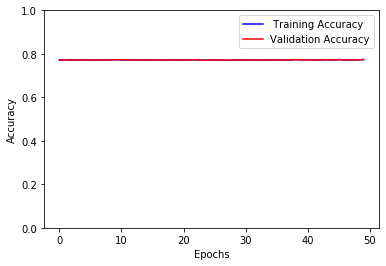

In [37]:
plt.plot(history.history['accuracy'],
         'b',
         label=' Training Accuracy')
plt.plot(history.history['accuracy'],
         'r',
         label='Validation Accuracy')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.show()

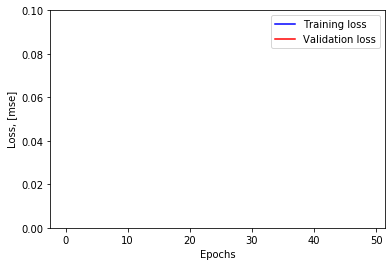

In [39]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

# RANDOM FOREST